## Table of Contents

1. [Problem Statement](#section1)
2. [Background](#section2)
3. [Preparing the data for analysis](#section3)
    -  3.1 [Examining the dataset](#section301)
    -  3.2 [Pre-profiling](#section302)
    -  3.3 [Pre-processing](#section303)
    -  3.4 [Post-profiling](#section304)
    -  3.5 [Checking for incorrect datatypes](#section305)
4. [Questions and EDA](#section4)
    -  4.1 [Find out the impact of directors on the movie](#section401)
       - 4.1.1 [Which director's movies had received higher Revenue ?](#section4011)
       - 4.1.2 [Which director's movies had received higher IMDB Rating ?](#section4012)
       - 4.1.3 [Which director's movies had received higher Metacritic score ?](#section4013)
       - 4.1.4 [Which director's movies had received higher number of Votes ?](#section4014)
    -  4.2 [Runtime of movie Vs Votes from viewers, Ratings, Revenue and Popularity.](#section402)
       - [Discovering the need to analyse movie outcomes based on different Runtime durations of a movie ](#section4021)
       - 4.2.1 [Which interval of Runtime receives higher votes, revenue ,ratings and metascore? ](#section40211)
    -  4.3 [What's the result in terms of votes, revenue,ratings and metascore of the movie based on Genre of  movie?](#section403)
       - 4.3.1 [Does the total number of Genres in the movie affect the votes, revenue, popularity, critical acclaim of the movie ?](#section4031)
       - 4.3.2 [Movies directed in which genre are more profitable and popular?](#section4032)
    -  4.4 [Is the growth of the movie industry on the rise ?](#section404)
       - 4.4.1 [Is the number of movies increasing over the years ?](#section4041)
       - 4.4.2 [Is the revenue from movies and popularity increasing over the years ?](#section4042)
           - 4.4.2.1 [Is the average revenue of the movies increasing over the years ?](#section40421)
           - 4.4.2.2 [How is the trend of flop(Decreased rating Vs  Number of Movies released) movies ? Are the number of flop movies increasing over years?](#section40422)
           - 4.4.2.3 [Who are the top 5 active directors by average revenue ?](#section40423)
           - 4.4.2.4 [Who are the top 5 active directors by average rating ?](#section40424)
           - 4.4.2.5 [Who are the top 5 active directors by average metascore ?](#section40425)
    -  4.5 [What is the relationship between Votes, Revenue, Rating and Metascore of movies ?](#section405)
5. [Conclusion](#section5)
6. [Actionable Insights](#section6)

<a id='section1'></a>
### 1. Problem Statement
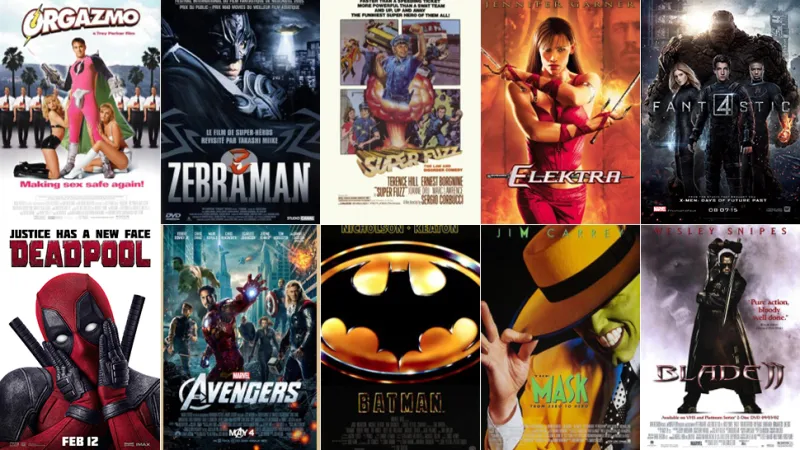

> Here given is the IMDB database of 1000 movies for the last 10 years (2006-2016).Identifying the characteristics of movies that earn:
> 1. More Revenue
> 2. Popularity based on rating (IMDB Rating)

> Also, identify the strategy that could be used in investing in movies to gain maximum profifts based on various criteria.

<a id='section2'></a>
### 2. Background

> The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period of 10 years 2006-2016.  
>IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.
> Most data in the database is provided by volunteer contributors. The site enables registered users to submit new material and edits to existing entries.
> Users registered on this site are  invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.

> It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.


<a id='section3'></a>
### 3. Preparing the data for analysis


In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns


# Read the data into Pandas DataFrame    
movies = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")  

<a id='section301'></a>
#### 3.1 Examining the dataset

To begin with, we analyze the data in terms of it's dimension(rows and attributes) by using the method- __shape__.
Next step would be to identify the data types of each variable in the dataset.
We would then identify which variables need to be transformed and normalized before proceeding with our analysis.

In [2]:
# Examine the head entries of the dataset
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# Find out the total rows and columns of the DataFrame
movies.shape

(1000, 12)

In [4]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [5]:
# Check for number of unique values for the column 'Title'
movies.Title.nunique()

999

#####  Why is unique 'Titles' count not equal to the no: of rows of the dataset. Are there any duplicate movies ?

In [6]:
# Check for duplicate values in the column 'Title'
movies.Title.duplicated().any()

True

In [7]:
# Find out the movies with duplicate 'Title'
movies.loc[movies.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


> ##### There are no duplicate movies. The movie with Title "The Host" was released in 2006 and 2013 that was directed by 2 different directors and casted different actors. So they are totally two different movies. 

In [8]:
# Count the number of missing values in each column
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [9]:
def missing_value_pct(series):
    """
    Returns the missing value percentage of a series
    """
    return series.isnull().mean()

In [10]:
# Percentage of missing values in Revenue column
missing_value_pct(movies["Revenue (Millions)"])

0.128

In [11]:
# Percentage of missing values in Metascore column
missing_value_pct(movies["Metascore"])

0.064

#### Observations : 
> Though "Revenue (Millions)" and "Metascore" have considerable percentage of missing values, these are key parameters that drives the success and popularity of a movie. So these columns cannot be dropped.

> The percentage of rows that have missing values for "Revenue (Millions) is around 13%. This is high, so we are going to fill the missing values.

> The percentage of rows that have missing values for "Metascore" is around 6%. This is not so high, so we are going to drop the rows that have missing values for this columns.


<a id='section302'></a>
#### 3.2 Pre-profiling

In [12]:
# Using the pandas_profiling lib to generate report before pre-processing
import pandas_profiling 
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_preprocessing.html")


<a id='section303'></a>
#### 3.3 Pre-processing

##### Pre-pofiling output shows the distribution of "Revenue (Millions)" is right skewed. So let's fill these missing values with the median value

In [13]:
# Filling the missing values with the median value
median_revenue = movies['Revenue (Millions)'].median()
movies['Revenue (Millions)'].fillna(value=median_revenue, inplace=True)

In [14]:
# Check if there are anymore missing values
movies['Revenue (Millions)'].isnull().any()

False

In [15]:
# Dropping the rows that having missing values for 'Metascore'
movies.dropna(subset=['Metascore'], inplace=True)

In [16]:
# Check if there are anymore missing values
movies.Metascore.isnull().any()

False

In [17]:
# Check the new shape of the dataset
movies.shape

(936, 12)

<a id='section304'></a>
#### 3.4 Post-profiling

In [18]:
# Using the pandas_profiling lib to generate report after pre-processing
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_postprocessing.html")

<a id='section305'></a>
#### 3.5 Checking for incorrect datatype

In [19]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

> ##### The movies columns and their datatypes seems to be mapped correctly. So no correction in datatypes required

> ##### It is a good idea to set the index of the DataFrame to movie title as the titles are unique

In [20]:
# Set the index of the DataFrame to the movie 'Title'
movies.set_index('Title', inplace=True)


In [21]:
# Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for ease of accessing columns
movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [22]:
# Check the head entries to see the changes
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [23]:
# Finally check for any missing values in the whole DataFrame
movies.isnull().any()

Rank           False
Genre          False
Description    False
Director       False
Actors         False
Year           False
Runtime        False
Rating         False
Votes          False
Revenue        False
Metascore      False
dtype: bool

<a id='section4'></a>
### 4. Questions & EDA

In this section, we are going to <strong>Question/Explore</strong> the dataset. This involves asking Questions, Exploring and Augmenting the dataset based on the questions. We will use descriptive statistics and also data visualization to help us explore the dataset.

<a id='section401'></a>
#### 4.1 Find out the impact of directors on the movie


<a id='section4011'></a>
#### 4.1.1 Which director's movies had received higher Revenue ?

In [24]:
# Calculate the number of movies directed by each director over the years 2006-2016
movies.Director.value_counts().head(10)

Ridley Scott          8
M. Night Shyamalan    6
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
Woody Allen           5
Antoine Fuqua         5
Danny Boyle           5
Justin Lin            5
Zack Snyder           5
Name: Director, dtype: int64

In [25]:
# Find out the top 5 directors by Revenue
revenue_directors = movies.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
top_5_revenue_directors


,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Gary Ross,408.000,1


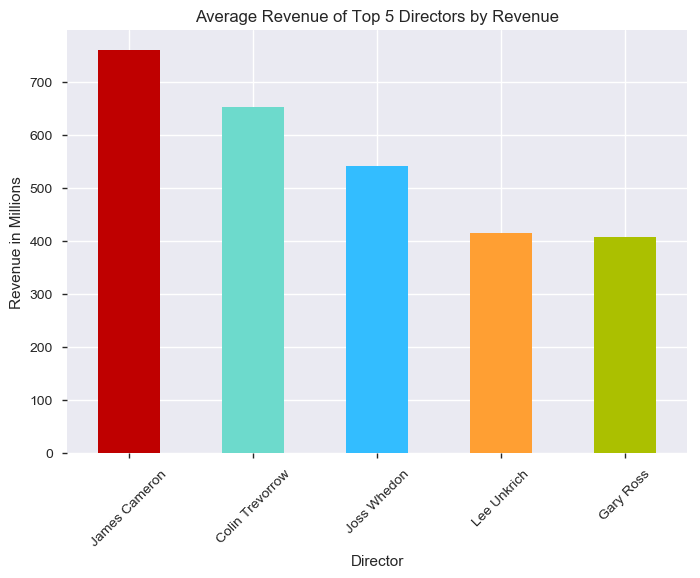

In [26]:
###### Plot the result
ax = top_5_revenue_directors['Revenue'].plot.bar(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue')
ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

#### Observation: 
The director who has earned the highest average revenue is __James Cameron__.

<a id='section4012'></a>
#### 4.1.2 Which director's movies had received higher IMDB Rating ?

In [27]:
# Find out the top 5 directors by IMDB Rating
rating_directors = movies.groupby('Director').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_rating_directors

,Rating,Movies Count
Director,,
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Aamir Khan,8.50,1
Florian Henckel von Donnersmarck,8.50,1


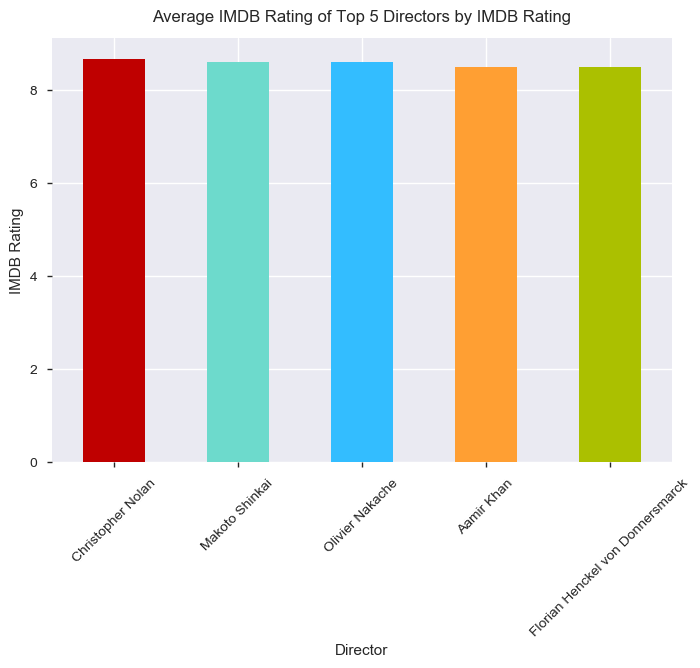

In [28]:
# Plot the result
ax = top_5_rating_directors['Rating'].plot.bar(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_ylabel('IMDB Rating')
ax.set_title('Average IMDB Rating of Top 5 Directors by IMDB Rating', y=1.02)
ax.set_xticklabels(top_5_rating_directors.index, rotation = 45);

#### Observation:
__Christopher Nolan__ directed movies had reived higher IMDB ratings

<a id='section4013'></a>
#### 4.1.3 Which director's movies had received higher Metacritic score ?

In [29]:
# Find out the top 5 directors by Metacritic Score
meta_directors = movies.groupby('Director').agg({'Metascore': 'mean', 'Rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

,Metascore,Movies Count
Director,,
Barry Jenkins,99.0,1
Kenneth Lonergan,96.0,1
Todd Haynes,95.0,1
Kathryn Bigelow,94.5,2
Michael Goi,94.0,1


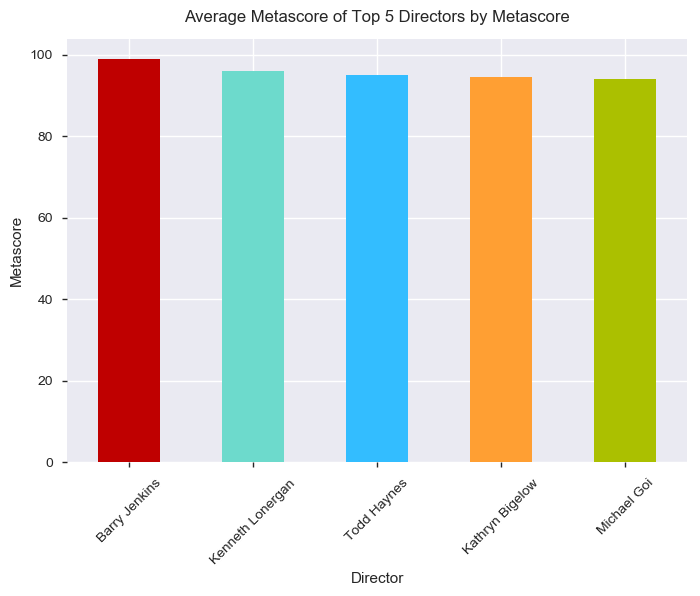

In [30]:
# Plot the result
ax = top_5_meta_directors['Metascore'].plot.bar(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_ylabel('Metascore')
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02)
ax.set_xticklabels(top_5_meta_directors.index, rotation = 45);

#### Observation:
__Barry Jenkins__ directed movie had received higher metascore ratings

<a id='section4014'></a>
#### 4.1.4 Which director's movies had received higher number of Votes ?

In [31]:
# Find out the top 5 directors by Metacritic Score
vote_directors = movies.groupby('Director').agg({'Votes': 'mean', 'Rank': 'count'})
top_5_vote_directors = vote_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Votes', ascending=False)[:5]
top_5_vote_directors

,Votes,Movies Count
Director,,
Christopher Nolan,1.311817e+06,5
James Cameron,9.354080e+05,1
Joss Whedon,7.812415e+05,2
Quentin Tarantino,7.797833e+05,3
Gary Ross,7.356040e+05,1


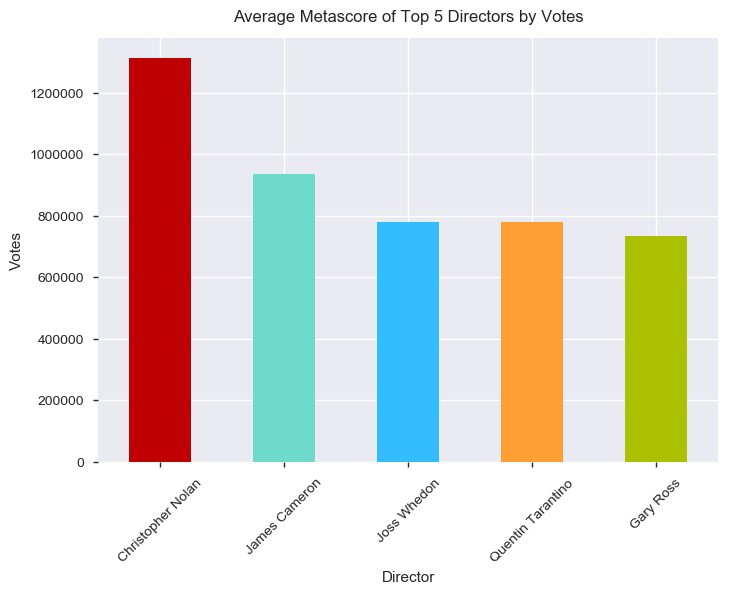

In [32]:
# Plot the result
ax = top_5_vote_directors['Votes'].plot.bar(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_ylabel('Votes')
ax.set_title('Average Metascore of Top 5 Directors by Votes', y=1.02)
ax.set_xticklabels(top_5_vote_directors.index, rotation = 45);

#### Observation:
__Christopher Nolan's__ movies had received highest number of votes followed by __James Cameron__ 

<a id='section402'></a>
#### 4.2 Runtime of movie Vs Votes from viewers, Ratings, Revenue and Popularity.

In [33]:
# Find out the percentiles of the Runtime column
movies.Runtime.describe()

count    936.000000
mean     113.272436
std       18.550798
min       66.000000
25%      100.000000
50%      111.000000
75%      123.000000
max      187.000000
Name: Runtime, dtype: float64

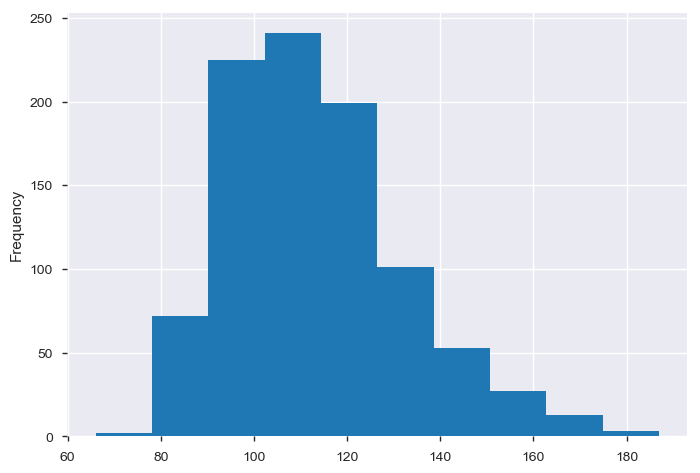

In [34]:
# Plot the distribution of the runtime column
movies.Runtime.plot.hist()

<a id='section4021'></a>
#### Discovering the need to analyse movie outcomes based on different Runtime durations of a movie

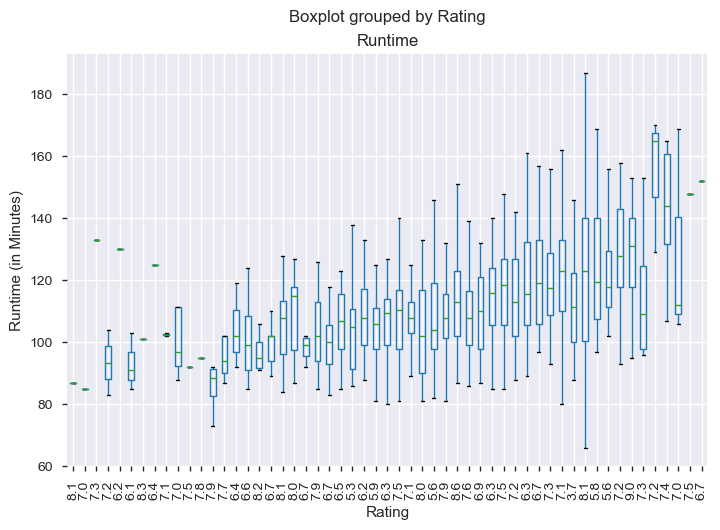

In [36]:
# use a visualization to detect whether there is a relationship between Runtime and Rating
ax = movies.boxplot(column='Runtime', by='Rating');
ax.set_ylabel('Runtime (in Minutes)');
ax.set_xlabel('Rating')
ax.set_xticklabels(movies.Rating, rotation = 90);

#### Observation :
The above boxplot tells us that there are distinct ratings given for different duration of movies but it __DOES NOT__  give us clear picture as there are too many values for Rating. So let's group and bin 'Runtime(in minutes)' variable in our dataset based on __describe__ function that we applied.We would use the values reported in different quartiles as the limits for ours __Runtime_levels__. This would help us find the trends in movie revenue,popularity earned based on duration of a particular movie more clearly than the above boxplot.
>| Runtime(in minutes) | Level     |
|---------|-----------------|
|   66-100  | Short|
| 100-111   |Medium|
| 111-123   | Moderately Long|
| 123-187   | Long|

In [37]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
movies['Runtime_levels'] = pd.cut(movies.Runtime, runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Moderately Long
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Moderately Long


Text(0.5,1.02,'Movies Count of each Runtime level')

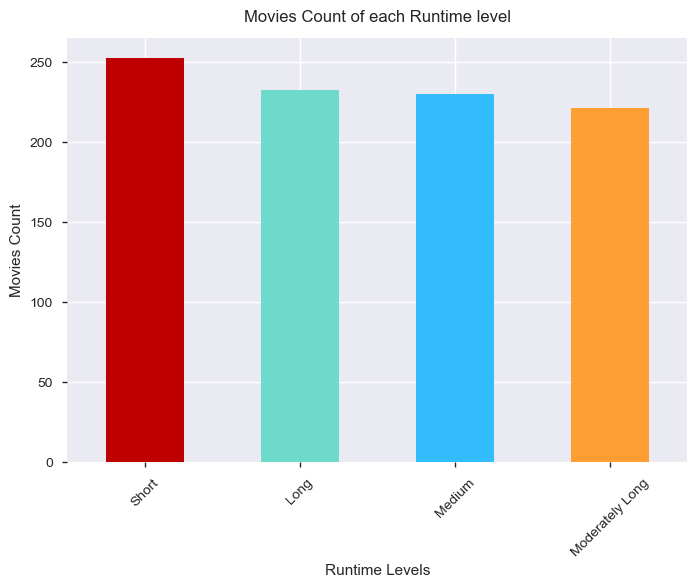

In [38]:
# Plot the count of different Runtime levels
ax = movies.Runtime_levels.value_counts().plot.bar(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.Runtime_levels.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Runtime level', y=1.02)

#### Observation:
There are around 250 short duration movies that were released over the past 10 years (2006-2016)

Now let's identify which movies earned higher revenue, ratings and metascore in each runtime level.

<a id='section40211'></a>
#### 4.2.1 Which interval of Runtime receives higher votes, revenue ,ratings and metascore?

In [39]:
# Find out the Runtime level that receives the highest mean revenue, mean Rating and mean Metascore
runtime_stats = movies.groupby('Runtime_levels')['Votes', 'Revenue', 'Rating', 'Metascore'].mean()
runtime_stats

,Votes,Revenue,Rating,Metascore
Runtime_levels,,,,
Short,102754.170635,58.164940,6.327381,56.456349
Medium,134021.352174,66.974196,6.579130,55.273913
Moderately Long,179916.773756,66.366244,6.848869,59.276018
Long,291241.310345,132.925733,7.195690,65.021552


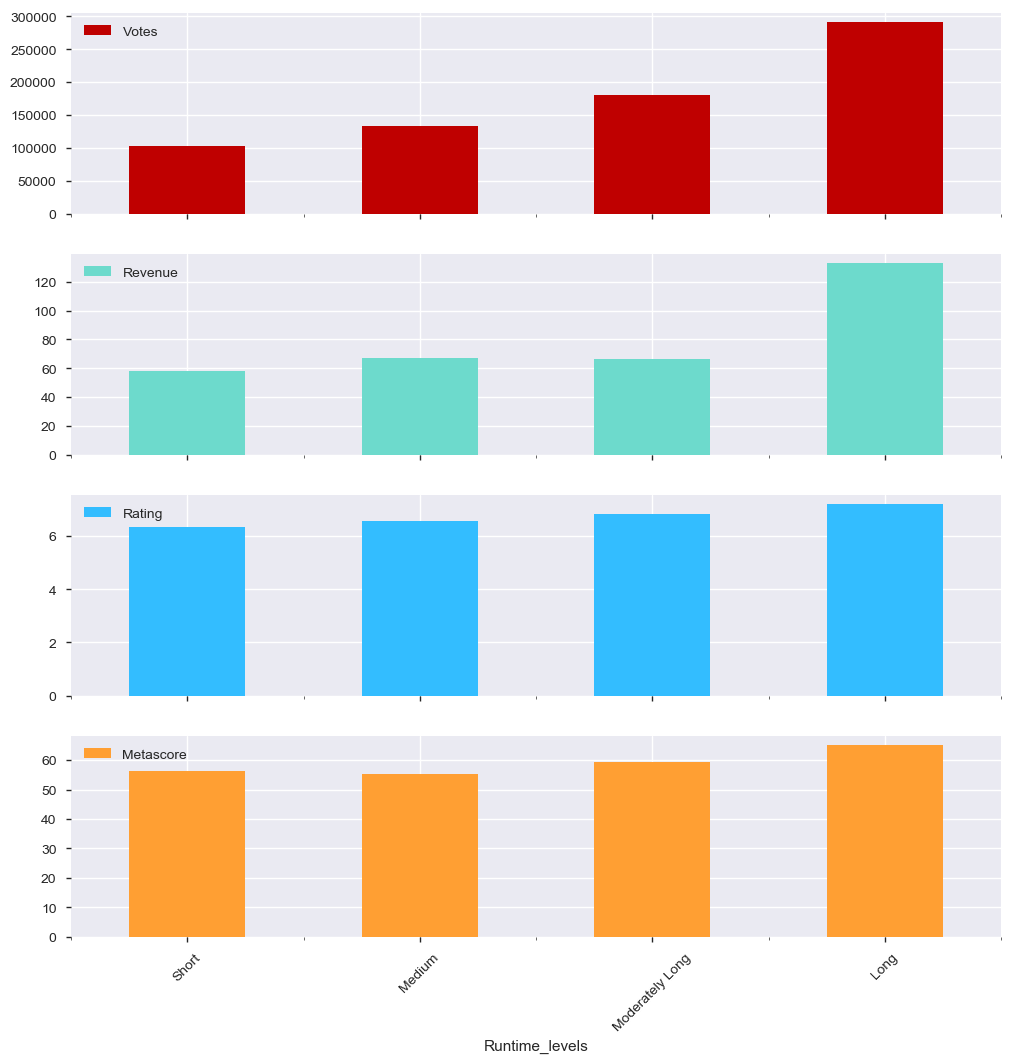

In [40]:
# Plot the above results
ax1, ax2, ax3 , ax4 = runtime_stats.plot.bar(subplots=True,color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
fig = ax1.get_figure()
fig.set_size_inches(12, 12)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax4.set_title("")
ax4.set_xticklabels(runtime_stats.index, rotation = 45);

##### Observation
From the above plots,we can see that viewers tend to rate movies more that have longe Runtimes(greater than 123 minutes).It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin. Also these are the movies that earned good metascores as well. 

<a id='section403'></a>
#### 4.3 What's the result in terms of votes, revenue,ratings and metascore of the movie based on Genre of  movie?



<a id='section4031'></a>
#### 4.3.1 Does the total number of Genres in the movie affect the votes, revenue, popularity, critical acclaim of the movie ?

In [42]:
# The Genre column contains Genre combination as string separated by comma
movies['Genre_count'] = movies.Genre.str.split(',').str.len()

In [43]:
movies.Genre_count.head()

Title
Guardians of the Galaxy    3
Prometheus                 3
Split                      2
Sing                       3
Suicide Squad              3
Name: Genre_count, dtype: int64

In [44]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = movies.groupby('Genre_count')['Votes', 'Revenue', 'Rating', 'Metascore'].mean()
genre_count_stats

,Votes,Revenue,Rating,Metascore
Genre_count,,,,
1,89703.423913,46.641848,6.365217,58.793478
2,143720.963636,55.710591,6.695455,58.677273
3,199008.967949,94.583734,6.794712,59.121795


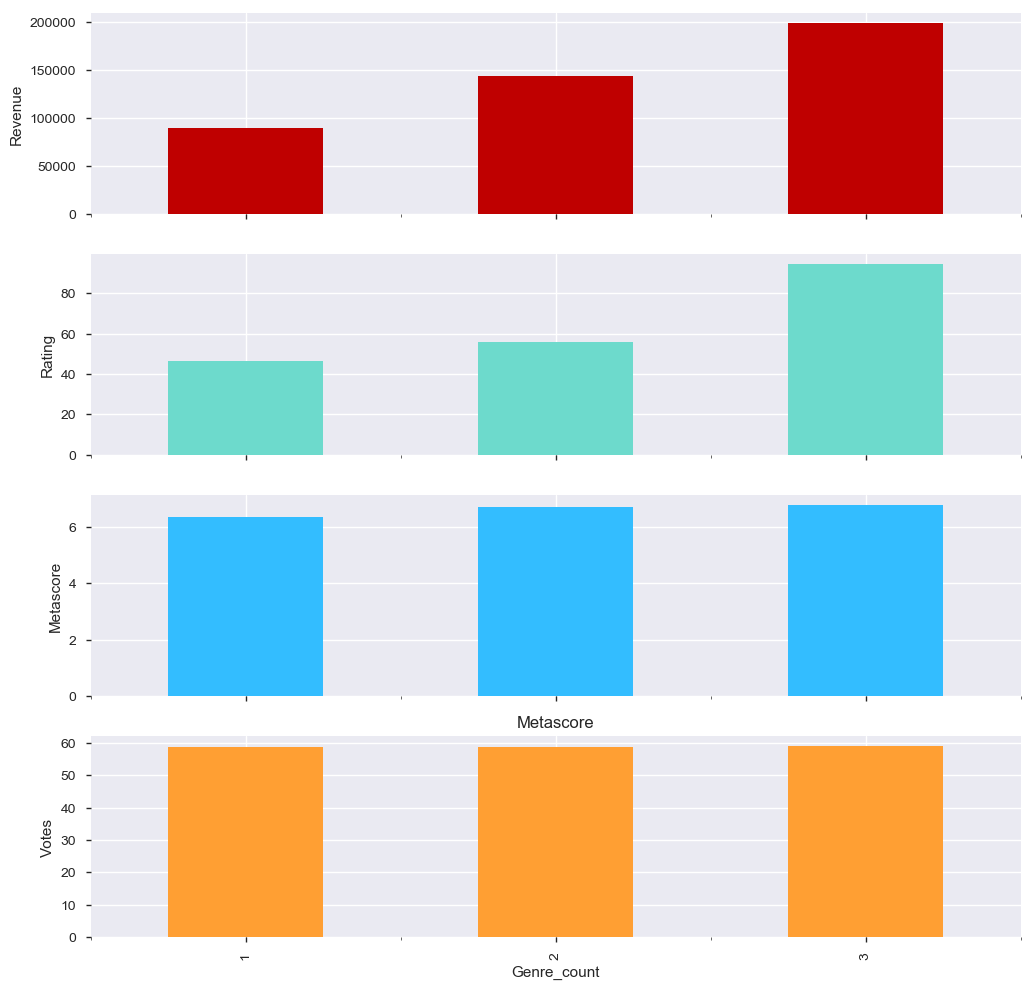

In [45]:
# Plot the results above
ax1, ax2, ax3, ax4 = genre_count_stats.plot.bar(subplots=True,color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
fig = ax1.get_figure()
fig.set_size_inches(12, 12)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax4.set_ylabel("Votes")
ax4.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

#### Observation :
Interestingly, the number of Genres in the movie increase the Revenue and IMDB Rating of the movie significantly. On average, a movie with 3 Genres tends to earn double the revenue than a movie with only 1 Genre.

<a id='section4032'></a>
#### 4.3.2  Movies directed in which genre are more profitable and popular?

In [46]:
import itertools
unique_genres = movies['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [47]:
#Determine the percent of total entries are attributed to each genre. Keep in mind that 
#since some films have multiple genres, these percentages won't add to 100%

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    pct = len(movies[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Music 2.1
Comedy 26.8
Mystery 9.9
Thriller 18.3
War 1.2
Horror 10.8
Western 0.6
Romance 13.100000000000001
Drama 47.4
Animation 4.6
Fantasy 9.8
Sci-Fi 11.4
Family 5.0
Sport 1.6
Action 28.9
Adventure 24.9
Musical 0.5
Biography 7.1
Crime 14.099999999999998
History 2.8000000000000003


In [48]:
#Throw our genre percentage values into a DF for easy plotting

genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Music,2.1
Comedy,26.8
Mystery,9.9
Thriller,18.3
War,1.2
Horror,10.8
Western,0.6
Romance,13.1
Drama,47.4
Animation,4.6


Text(0.5,1,'Percent of Total Movies Made from Top 5 Genres')

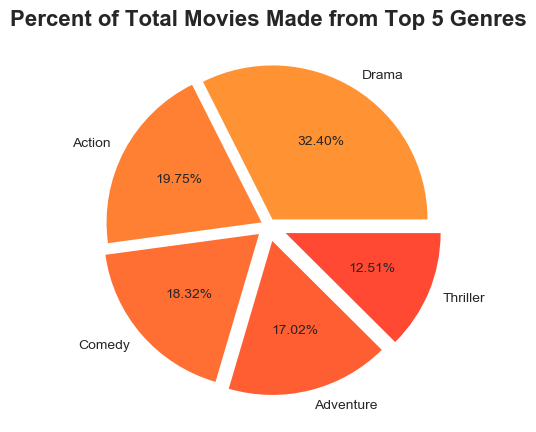

In [49]:
#Taking a sum of the total movies made from the top 5 genres,
#which contributed to the most in terms of movies made?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#FF9333', '#FF8033', '#FF6E33', '#FF5E33', '#FF4933' ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(5,5), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

#### Observation:
From the above plot, we can identify that more directors directed movies in the genre of __Drama and Action__ combined with __Comedy, Adventure or Thriller__.
> We can now determine the revenue for each of the top genres identified above.

In [50]:
#we can determine revenue percentage

genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    revenue_pct = movies[current_genre].xs('Revenue', axis=1).sum() / movies['Revenue'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1
    print(genre, revenue_pct)

Music 1.5380196520653087
Comedy 26.60115184239601
Mystery 7.023794447437348
Thriller 16.078809140898027
War 0.8340872937261631
Horror 5.64009351623175
Western 0.7487332869907394
Romance 7.5184903906606575
Drama 31.617420051416197
Animation 11.518377643972691
Fantasy 16.579453398234133
Sci-Fi 19.907419354027645
Family 8.012385726533967
Sport 1.394955750233268
Action 47.347958378475006
Adventure 51.062836031777096
Musical 0.5401916137901902
Biography 5.488090601756334
Crime 11.569550348475929
History 1.9425050117358449


In [51]:
genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df

,Percent
Music,1.538020
Comedy,26.601152
Mystery,7.023794
Thriller,16.078809
War,0.834087
Horror,5.640094
Western,0.748733
Romance,7.518490
Drama,31.617420
Animation,11.518378


Text(0.5,1,'Percent of Total Revenue from Top 5 Genres')

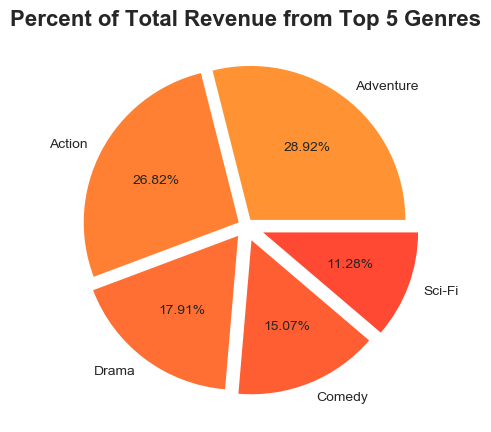

In [52]:
#Taking a sum of the revenue from the top 5 genres,
#which contributed to the most in terms of revenue?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#FF9333', '#FF8033', '#FF6E33', '#FF5E33', '#FF4933' ]
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(5,5), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

#### Observation:
From the above plot, we can identify that __Adventure and Action__ movies have whopping percentages in terms of their revenues over all the years.

<a id='section404'></a>
#### 4.4. Is the growth of the movie industry on the rise ?

<a id='section4041'></a>
#### 4.4.1 Is the number of movies increasing over the years ?

In [53]:
movies_year = movies.groupby('Year')['Rank'].count()

In [54]:
movies_year.head()

Year
2006    41
2007    46
2008    49
2009    49
2010    59
Name: Rank, dtype: int64

Text(0,0.5,'Movies Count')

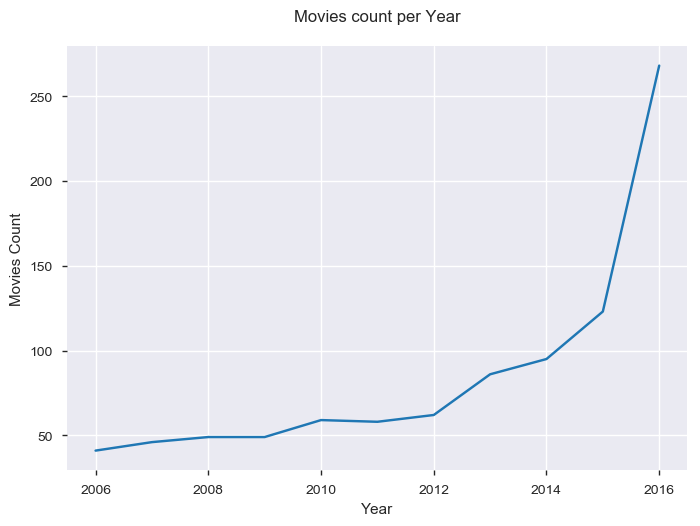

In [55]:
# Plot the movies count per year
ax = movies_year.plot.line();
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

#### Observation :
> The number of movies released over the last 10 years period is showing an upward trend. There is dramatic increase(more than double) in the number of movies released in 2016, when compared to the number of movies released in 2015.

<a id='section4042'></a>
#### 4.4.2 Is the revenue from movies and popularity increasing over the years ?

In [56]:
movies_revenue = movies.groupby('Year')['Revenue'].sum()

In [57]:
movies_revenue.head()

Year
2006    3577.480
2007    4191.230
2008    4729.205
2009    5400.330
2010    6085.620
Name: Revenue, dtype: float64

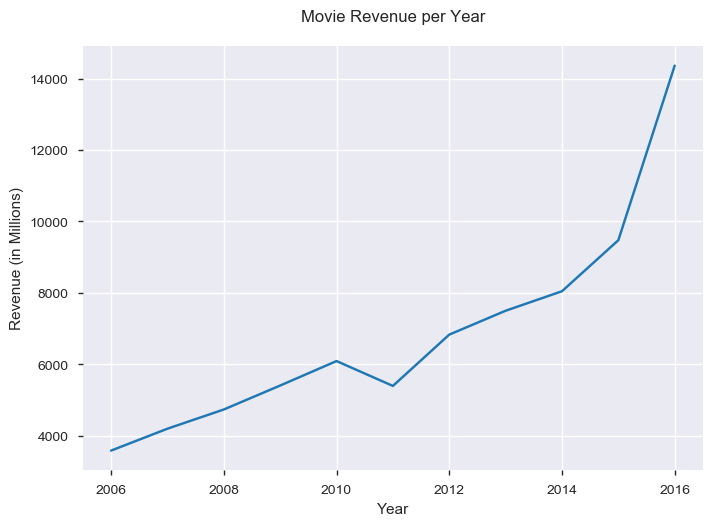

In [58]:
# Plot the Revenue for each year
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

#### Observation : 
> The revenue from movies over the last 10 year period is showing an upward trend. There is dramatic increase in the revenue from movies released in 2016, when compared to the revenue from movies released in 2015. This is correlating with the dramatic increase in the number of movies released in 2016 when compared to 2015, as shown in the section 4.4.1

<a id='section40421'></a>
#### 4.4.2.1 Is the average revenue of the movies increasing over the years ?

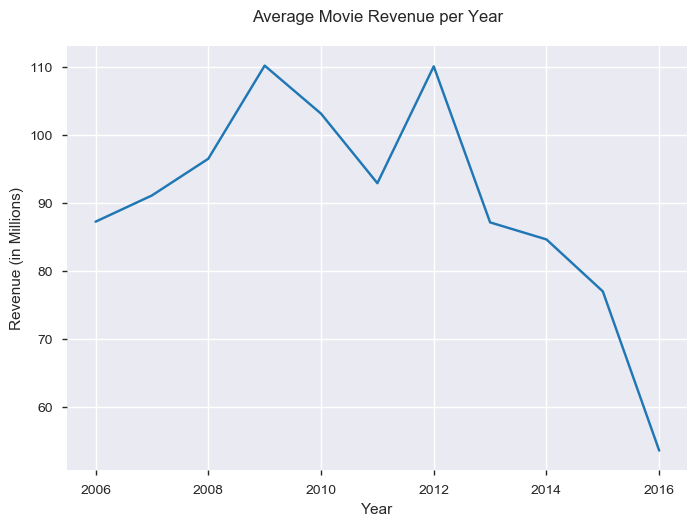

In [59]:
movies_avg_revenue = movies.groupby('Year')['Revenue'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

#### Observation : 
>The average revenue of movies per year decreasing, while the total revenue of movies is increasing over the years.
This is most probably because of the fact the total number of movies released per year is increasing. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.

<a id='section40422'></a>
#### 4.2.2.2. How is the trend of flop(Decreased rating Vs  Number of Movies released) movies ? Are the number of flop movies increasing over years?

In [60]:
movies_flops = movies[movies.Rating<5]
movies_flops.sort_values('Rating', ascending=True)

# Find out the top 5 directors by Metacritic Score
flop_directors = movies_flops.groupby('Year').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_flop_directors = flop_directors.sort_values('Rating', ascending=True)[:5]
top_5_flop_directors

,Rating,Rank
Year,,
2008,1.900000,1
2009,3.550000,2
2016,4.294737,19
2015,4.414286,7
2010,4.466667,3


In [61]:
top_5_flop_directors = top_5_flop_directors.groupby('Year')['Rank'].mean()
top_5_flop_directors.head()

Year
2008     1
2009     2
2010     3
2015     7
2016    19
Name: Rank, dtype: int64

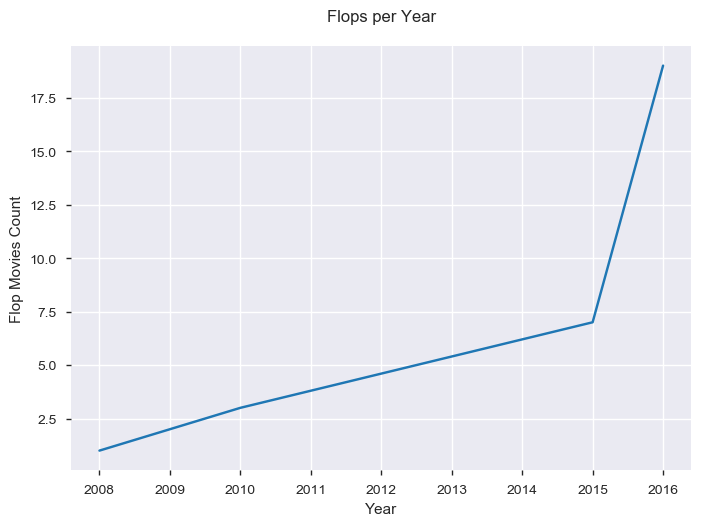

In [62]:
ax = top_5_flop_directors.plot.line();
ax.set_title('Flops per Year', y=1.04)
ax.set_ylabel('Flop Movies Count');

#### Observation:

>The number of flops has an upward trend with increasing number of movies being released per year.The number of movies that didn't earn impressive revenue drastically increased in the year 2016 in comparision with all previous years.The Popularity of movies in terms of IMDB rating decreasing over the years, although the revenue for the movies increasing over the years

#### What factors to consider to proceed with our analysis ? 

The average revenue of movies per year decreasing and also the average rating for movies has decreased dramatically in the year 2016 when compared to the year 2015 and all other previous years.

    So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea. 
    For example James Cameron has only directed a single movie (Avatar in 2009) in the last 10 years.
    In that year(2009), only 50 movies were released, according to the 'Movies Count per Year' line graph (above). 
    But in 2016, the trend has changed: The number of movies released in 2016 is around 5 times that of movies in 2009.

    So we need to find out the Directors who are more active in terms of directing more movies. 
    Among them we need to find out directors who earn more revenue, rating and metascore. So let's do that below.

In [63]:
# Lets take the list of all directors who have directed total number of movies of 5 or more.
most_active_directors = movies['Director'].value_counts()[movies['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
M. Night Shyamalan    6
David Yates           6
Paul W.S. Anderson    6
Michael Bay           6
Woody Allen           5
Antoine Fuqua         5
Danny Boyle           5
Justin Lin            5
Zack Snyder           5
Peter Berg            5
David Fincher         5
Martin Scorsese       5
Christopher Nolan     5
J.J. Abrams           5
Denis Villeneuve      5
Name: Director, dtype: int64

In [64]:
# Find out the movies of these active directors
active_director_movies = movies[movies.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels,Genre_count
Title,,,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long,3
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long,2
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Long,3
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,Moderately Long,3
Resident Evil: The Final Chapter,35,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Medium,3


In [65]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('Director')['Revenue', 'Rating', 'Metascore'].mean()
active_director_stats

,Revenue,Rating,Metascore
Director,,,
Antoine Fuqua,78.642000,7.040000,52.400000
Christopher Nolan,303.018000,8.680000,74.800000
Danny Boyle,36.680000,7.420000,75.000000
David Fincher,105.544000,7.820000,78.600000
David Yates,271.751667,7.433333,68.500000
Denis Villeneuve,43.242000,7.760000,75.600000
J.J. Abrams,336.690000,7.580000,74.600000
Justin Lin,164.958000,6.820000,57.200000
M. Night Shyamalan,69.745833,5.533333,40.000000


<a id='section40423'></a>
#### 4.4.2.3 Who are the top 5 active directors by average revenue ?

In [66]:
# Lets find out the top 5 active directors by average revenue
top_5_active_directors_by_revenue = active_director_stats.sort_values('Revenue', ascending=False)
top_5_active_directors_by_revenue[:5]

,Revenue,Rating,Metascore
Director,,,
J.J. Abrams,336.690000,7.580000,74.600000
Christopher Nolan,303.018000,8.680000,74.800000
David Yates,271.751667,7.433333,68.500000
Michael Bay,236.886667,6.483333,43.833333
Zack Snyder,195.148000,7.040000,48.000000


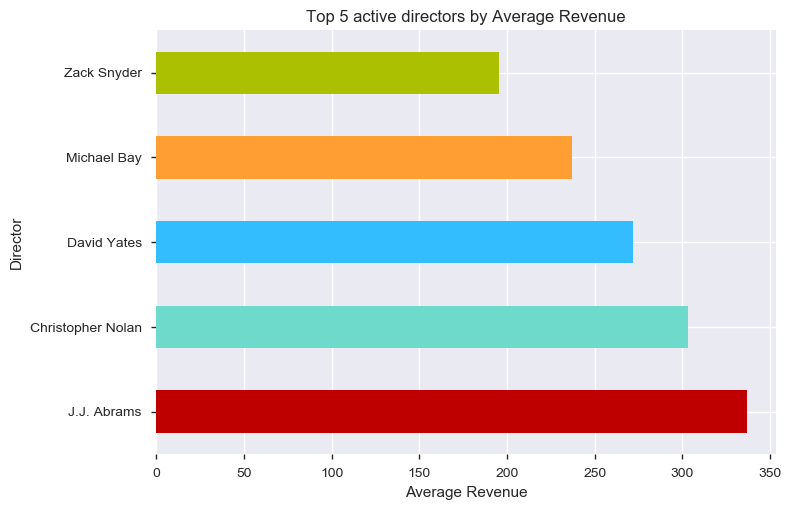

In [67]:
ax = top_5_active_directors_by_revenue[:5].Revenue.plot.barh(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_title("Top 5 active directors by Average Revenue")
ax.set_xlabel('Average Revenue');

<a id='section40424'></a>
#### 4.4.2.4 Who are the top 5 active directors by average rating ?

In [68]:
# Lets find out the top 5 active directors by average rating
top_5_active_directors_by_rating = active_director_stats.sort_values('Rating', ascending=False)
top_5_active_directors_by_rating[:5]

,Revenue,Rating,Metascore
Director,,,
Christopher Nolan,303.018,8.68,74.8
Martin Scorsese,91.622,7.92,77.0
David Fincher,105.544,7.82,78.6
Denis Villeneuve,43.242,7.76,75.6
J.J. Abrams,336.690,7.58,74.6


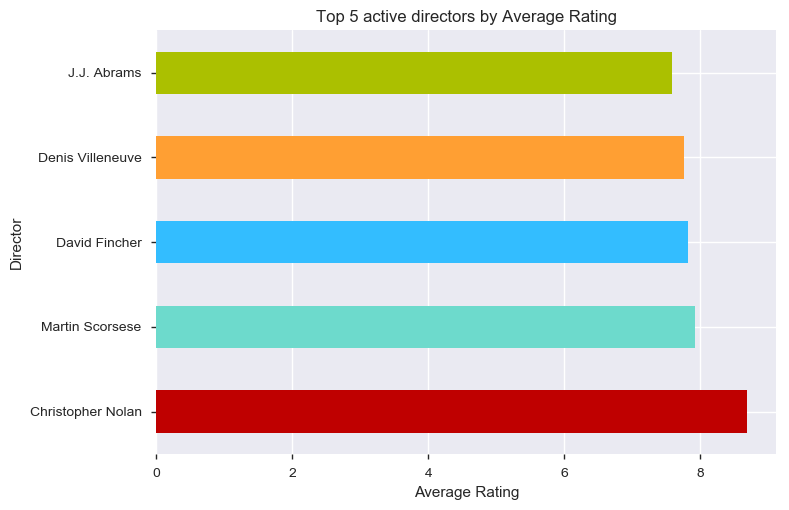

In [69]:
ax = top_5_active_directors_by_rating[:5].Rating.plot.barh(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_title("Top 5 active directors by Average Rating")
ax.set_xlabel('Average Rating');

<a id='section40425'></a>
#### 4.4.2.5 Who are the top 5 active directors by average metascore ?

In [70]:
# Lets find out the top 5 active directors by average metascore
top_5_active_directors_by_metascore = active_director_stats.sort_values('Metascore', ascending=False)
top_5_active_directors_by_metascore[:5]

,Revenue,Rating,Metascore
Director,,,
David Fincher,105.544,7.82,78.6
Martin Scorsese,91.622,7.92,77.0
Denis Villeneuve,43.242,7.76,75.6
Danny Boyle,36.680,7.42,75.0
Christopher Nolan,303.018,8.68,74.8


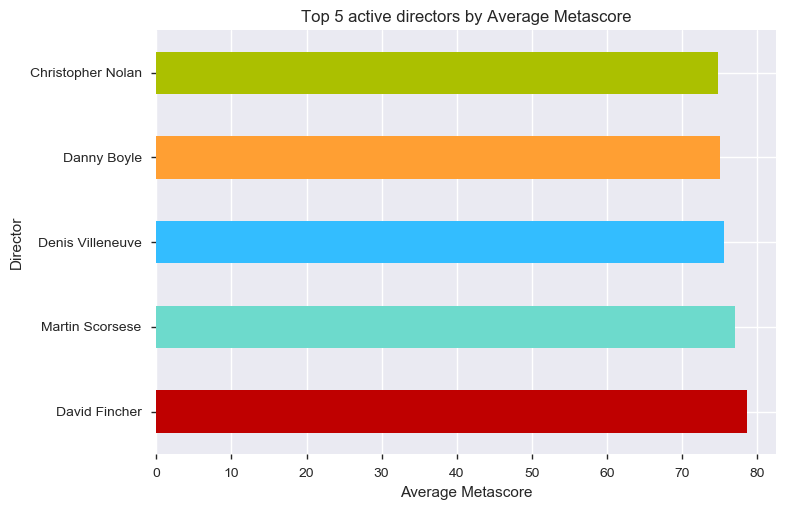

In [71]:
ax = top_5_active_directors_by_metascore[:5].Metascore.plot.barh(color=['#BF0000', '#6DDACC', '#33BDFF', '#FF9F33', '#ABC000']);
ax.set_title("Top 5 active directors by Average Metascore")
ax.set_xlabel('Average Metascore');

<a id='section405'></a>
#### 4.5 What is the relationship between Votes, Revenue, Rating and Metascore of movies ?

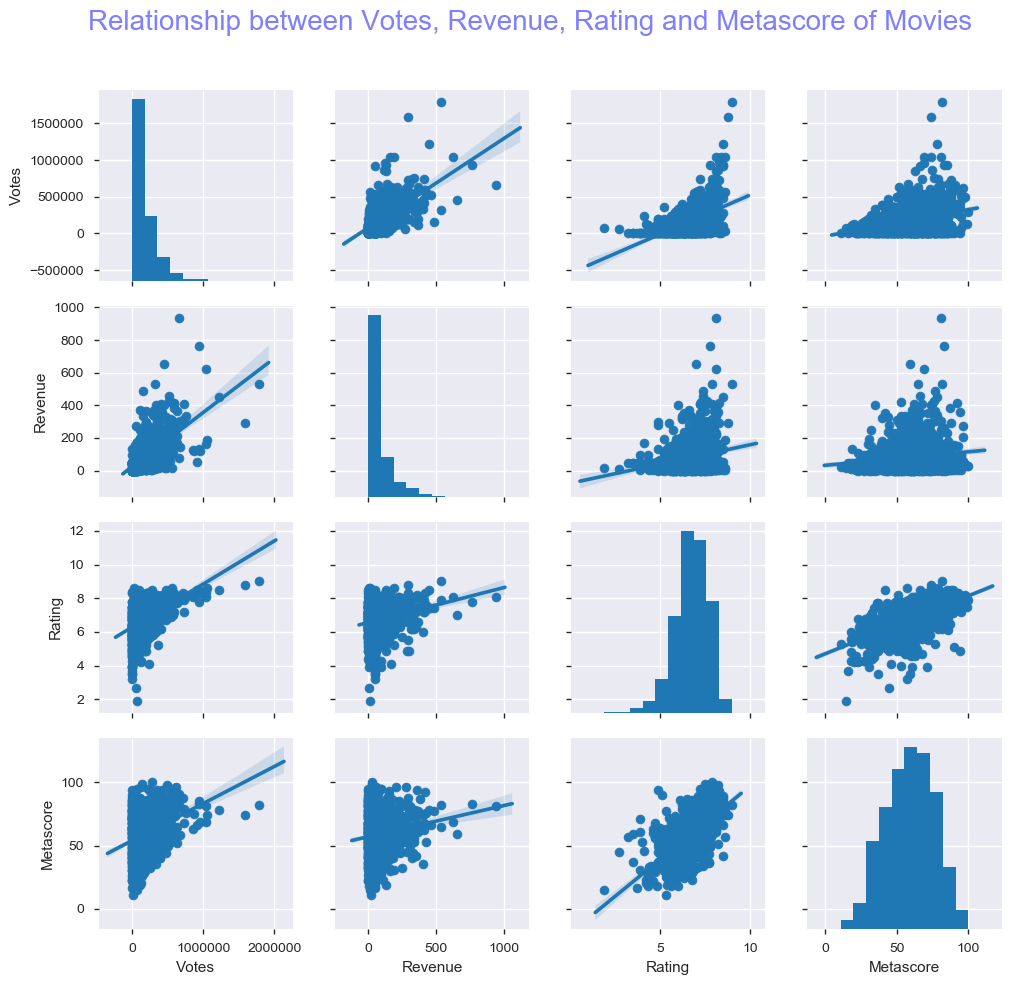

In [72]:
a=sns.pairplot(movies, palette="muted",height=2.5,vars=['Votes', 'Revenue', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Votes, Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5);

> ##### Observation:
Rating and Metascore have strong correlation. So it means the Registered users on IMDB and Critics on Metacritic tend to agree with each other for most movies.


<a id='section5'></a>
### 5. Conclusion

This section draws the conclusion from the exploration done on the dataset in Section 4.

<strong>Director</strong>
 1. The director who has earned the highest average revenue is James Cameron. However he has directed only 1 movie in the 10 year period.
 2. Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period and he infact had gained highest number of votes from viewers.
 3. Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes
 
 __Looking at the Movie Industry Trend, most active directors are more favored.__
 
    1. Among the most active directors, J J Abrams's movies earn more in terms of Average Revenue
    2. Christopher Nolan is the most popular active director in terms of Average Rating among people
    3. With respect to Directors who are most active, critics favor David Fincher in terms of Average Metascore.
 
<strong>Runtime</strong>
    Movies with Long runtimes (> 123 minutes) earn more in terms of Votes, Revenue, Rating and Metascore with Revenue beating all others drastically. 
  
<strong>Genre</strong>
 1. Interestingly, the number of Genres in the movie increase the Revenue and IMDB Rating of the movie significantly. On average, a movie with 3 Genres tends to earn double the revenue than a movie with only 1 Genre. More directors directed movies in the genre of Drama and Action combined with Comedy, Adventure or Thriller that were proven to be more popular as well.
 2. Adventure and Action movies have whopping percentages in terms of their revenues over all the years.
 
<strong>Industry Growth</strong>
 1. Industry is growing with respect to number of movies released and the total revenue gained year on year.
 2. However, the number of flops has an upward trend with increasing number of movies being released per year.The number of movies that didn't earn impressive revenue drastically increased in the year 2016 in comparision with all previous years. This is probably because of increased competition and more movies released in the industry.
 3. The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.
 
<strong>Rating for movies in General</strong>
    From the correlation graph, it is clear that People and Critics rate movies in a similar manner.In general, movies with higher rating and metascore tend to earn more revenue as well.


<a id='section6'></a>
### 6. Actionable Insights

This section describes the actions that any one should do who is looking to invest on movies for profits and popularity as described Problem Statement (Section 1). This is based on the conclusions drawn from the EDA done in Section 4.

<strong>Produce multiple movies with best features</strong> - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.
1. <strong>Produce movies with active directors</strong> - those people who directs multiple moderately high budget movies. For instance, Christopher Nolan movies is certain to bring in more Revenue, Rating and Metascore.
2. <strong>Produce movies that have Long runtimes</strong> - Runtime greater than 2 hrs.
3. <strong>Produce movies with 3 Genre combination</strong> - Include a mix of Drama, Animation, Adventure, Action, Thriller. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.
4. <strong>Produce movies that will satisfy both People and Critics</strong> - These movies will earn higher Revenue more often than not.